In [1]:
import numpy as np
from matplotlib import pyplot
from numpy.random import normal
from scipy.stats import norm

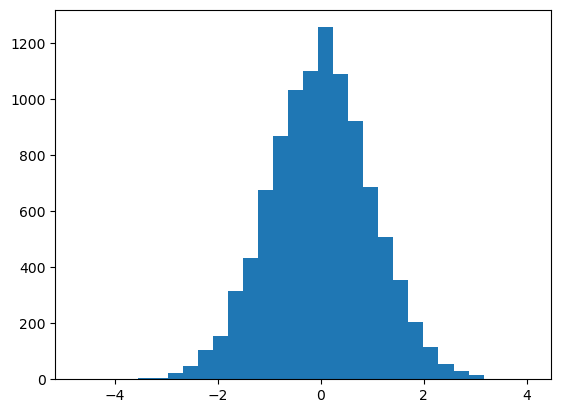

In [12]:
sample = normal(size = 10000) # generador de datos artificiales
pyplot.hist(sample, bins = 30)
pyplot.show()

## Estimación paramétrica
basada en forzar los datos de la distribución 

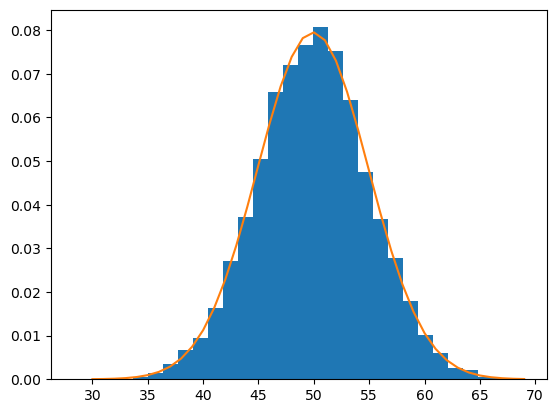

In [35]:
sample = normal(loc=50, scale=5, size=10000) # loc = mu=50, scale = sigma=5
# hipotesis de modelamiento (filosofia frecuentista): mis datos deben seguir una distribucion gausiana
mu = sample.mean() # donde el promedio es el promedio de los datos 
sigma = sample.std() # mi desviacion es la desviacion de mis datos
dist = norm(mu, sigma)
values = [value for value in range(30, 70)] # construccion de valores teorios sobre los cuales evaluare mi funcion teorica de densidad de probabilidad
probabilidades = [dist.pdf(value) for value in values]
pyplot.hist(sample, bins=30, density=True) # density=True normaliza los conteos para que me de probabilidades 
pyplot.plot(values, probabilidades)
pyplot.show()

## Estimación no paramétrica
No se estan forzando parametros de una distribución unica. si no que se combinan varias distribuciones. 

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html


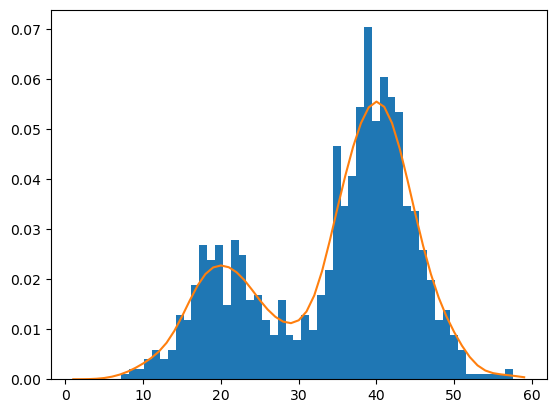

In [39]:
from numpy import hstack # sirve para juntar varios arreglos
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2)) # juntar los datos en uno solo

model = KernelDensity(bandwidth=2, kernel='gaussian') # creamos un modelo con parametro de suavisado y funcion base
sample = sample.reshape((len(sample), 1)) # cambiamos la forma y tamaño del arreglo
model.fit(sample) # ajuste de los datos

values = np.asarray([value for value in range(1, 60)]) # ver el ajuste en un intervalo razonable
values = values.reshape((len(values), 1)) # este tipo de reshape hay que hacerlo para hacer el fit o usar metodos de un modelo de sk
probabilities = model.score_samples(values) #probabilidad logarítmica para optimizacion computancional y evitar 'underflow'
probabilities = np.exp(probabilities)  # inversión de probabilidad para regresar al espacio original

pyplot.hist(sample, bins=50, density=True) # grafica de datos generados
pyplot.plot(values[:], probabilities) # grafica de distribucion teorica ajustada por densidad de kernel
pyplot.show()